 <img src='bit_hd.jpg'/>

## <span style='color:blue'>Definition</span>:   LINEAR REGRESSION ALGORITHM TO PREDICT PETROL CONSUMPTION 

## <span style='color:blue'>Prepared By</span>:  PRATIK VASAVA

## LINEAR REGRESSION:

<SPAN STYLE="color:green; font-size: 14pt;font-family:Times New Roman">
    
Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two 

things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables 

in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign 

of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one 

dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and 

one independent variable is defined by the formula <span style="color:red"> y = c + b*x</span>, where y = estimated dependent variable score, c = constant, 

b = regression coefficient, and x = score on the independent variable.
</span>


### Prerequisites Python libraries
#### Pandas(https://pandas.pydata.org/getpandas.html) =Library for data data manipulation and analysis.
#### Matplolib(https://matplotlib.org/)=Library for to performe mathamtical oprations.
#### numpy(http://www.numpy.org/)=Library  NumPy is a general-purpose array-processing package. 


# Importing Libararies

In [1]:
#Loadindg all necessary python libraries.python version(v3.7).
#data manipulation and analysis
import pandas as pd
#scientific computing 
import numpy as np
#visulatition 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
#CREATING VARIBLE FOR  FILE
file='petrol_consumption.csv'

In [3]:
#loading Dataset
#set column names for dataset.
#pandas function use to read file.
col=['Petrol_tax','Average_income','Paved_Highways','driver_licence','Petrol_Consumption']
dataset=pd.read_csv(file,names=col)
dataset=dataset.drop([0],axis=0)
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,driver_licence,Petrol_Consumption
1,9.00,3571,1976,0.5250,541
2,9.00,4092,1250,0.5720,524
3,9.00,3865,1586,0.5800,561
4,7.50,4870,2351,0.5290,414
5,8.00,4399,431,0.5440,410


## Data Feature Explanation.

#            
    
            - Petrol_tax              Current Tax rate on petrol commodity.
            - Average_income          Annual average income of individual.
            - Paved_Highways          indicate paved condition of road 
            - driver_licence          No of driver having licenced
            - Petrol_Consumption      usage of petrol.
            

## EDA(Exploratering Data Analysis)

In [4]:
# Observe data 
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,driver_licence,Petrol_Consumption
1,9.00,3571,1976,0.5250,541
2,9.00,4092,1250,0.5720,524
3,9.00,3865,1586,0.5800,561
4,7.50,4870,2351,0.5290,414
5,8.00,4399,431,0.5440,410


#### QUICK  SNAPE OF FIRST FIVE ENTRY OF DATASET

In [5]:
#checking shape of dataset total number of rows and columns
dataset.shape

(48, 5)

In [6]:
#getting information related to datatype and null entry.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 48
Data columns (total 5 columns):
Petrol_tax            48 non-null object
Average_income        48 non-null object
Paved_Highways        48 non-null object
driver_licence        48 non-null object
Petrol_Consumption    48 non-null object
dtypes: object(5)
memory usage: 2.2+ KB


In [7]:
#conver into integer datatype.
for feature in dataset:
    dataset[feature]=dataset[feature].astype(float)
    dataset  #set dataset all columns as integer type.

In [8]:
#calculate basic statastic calculation for each feature of dataset.
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,driver_licence,Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


### Missing values

  - very important task in analysis to find missing values because most of stastical tools oprates on 
 
    mathamatical formulas whose taken magitutes of data as  input,and if in  such a scenario when your data having 
 
    no magnitutde (value) or 'Nan' then performed calcaulation may not correctly answered.

In [9]:

#dataset=dataset.drop(columns=['Population_Driver_licence(%)'],axis=1)
dataset['driver_licence']=dataset['driver_licence']
dataset=dataset.copy()


In [10]:
#dataset=pd.read_csv(file,c=col1)
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,driver_licence,Petrol_Consumption
1,9.0,3571.0,1976.0,0.525,541.0
2,9.0,4092.0,1250.0,0.572,524.0
3,9.0,3865.0,1586.0,0.580,561.0
4,7.5,4870.0,2351.0,0.529,414.0
5,8.0,4399.0,431.0,0.544,410.0


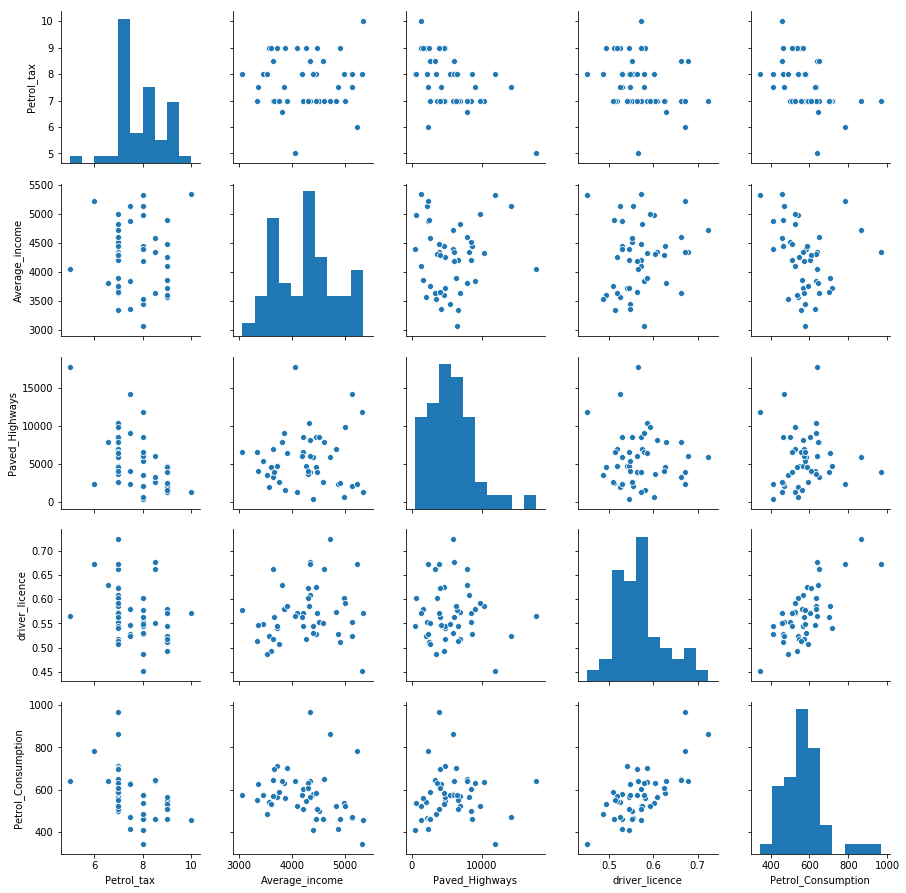

In [11]:
#Generate pairplot for check correlation.
sns.pairplot(dataset)

In [12]:
#check for catogory in this feature
dataset['Petrol_tax'].value_counts()

7.00     19
8.00     10
9.00      8
7.50      4
8.50      3
6.58      1
6.00      1
5.00      1
10.00     1
Name: Petrol_tax, dtype: int64

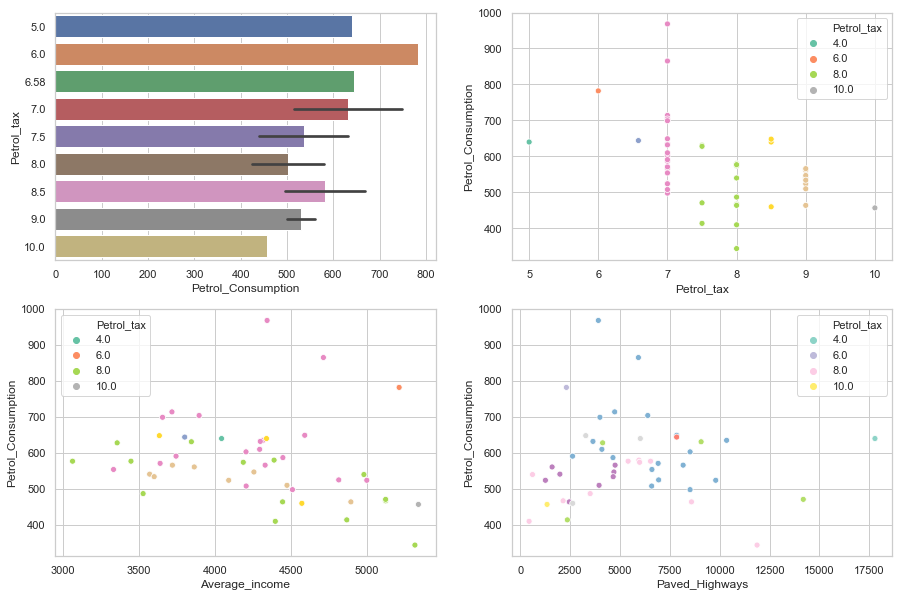

In [32]:
#form the observation 'Petrol_tax' and 'Petrol_Consumption' have good linear relationship.
#also plotting both for more information.

fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="Petrol_Consumption", y="Petrol_tax", data=dataset,ci="sd",orient = 'h')
#dataset.groupby('Petrol_tax')['Petrol_Consumption'].median().plot.bar()

#plt.ylabel('Petrol_Consumption')
#sns.set_style("dark")
#sns.boxplot(dataset['Petrol_tax'])
#plt.title("whitegrid")

ax1=fig.add_subplot(2,2,2)

#sns.set_style("dark")
#sns.boxplot(dataset['Average_income'])
#sns.scatterplot('Petrol_tax','Petrol_Consumption',hue='Petrol_tax',data=dataset)
cmap = sns.cubehelix_palette(dark=.7, light=.3, as_cmap=True)
ax = sns.scatterplot(x="Petrol_tax", y="Petrol_Consumption",
                     hue="Petrol_tax", 
                     palette="Set2",
                     data=dataset)
ax1=fig.add_subplot(2,2,3)
#sns.relplot(x="Average_income", y="Petrol_Consumption", hue="Petrol_tax", data=dataset)
cmap = sns.cubehelix_palette(dark=.5, light=.5, as_cmap=True)
ax = sns.scatterplot(x="Average_income", y="Petrol_Consumption",
                     hue="Petrol_tax", 
                     palette="Set2",
                     data=dataset)

ax1=fig.add_subplot(2,2,4)
#sns.relplot(x="Average_income", y="Petrol_Consumption", hue="Petrol_tax", data=dataset)
cmap = sns.cubehelix_palette(dark=.5, light=.5, as_cmap=True)
ax = sns.scatterplot(x="Paved_Highways", y="Petrol_Consumption",
                     hue="Petrol_tax", 
                     palette="Set3",
                     data=dataset)

     - petrol consumption getting lower when Tax increase above 6% -7%.and also below 5% tax, consumption of petrol is  
       relatively low.

     - Around 6% average tax is seem good.

     - when petrol_tax between 6% to 8% petrol_consumation relatively incease that means economy flow,market run goods and       demand generating,products are transporting.
  
     - we claerly seen from forth graph as road quality incease there is not huge change observe in petrol consumption. 

In [33]:

      
n_avg=np.array(dataset['Average_income'])
print(len(n_avg))
std_avg=np.std(n_avg)
mean_avg=np.mean(n_avg)
upper,lower=(mean_avg+std_avg),(mean_avg-std_avg)
print(mean_avg)
#print(std_avg)
print(upper)
print(lower)
values=[]
for i in n_avg:
    if (i>lower) and (i<upper):
        values.append(['average_income'])
        

values=pd.DataFrame(values)
dataset['chart']=values
dataset['chart'].fillna('Uncertain_income_',inplace=True)


48
4241.833333333333
4809.450403979459
3674.2162626872073


In [ ]:
q1=len(n_avg)
q2=len(values)
per_nA=round(q2*100/q1)
print(per_nA)

In [ ]:
plt.figure(figsize=(8,5))
chart1 = dataset.groupby('chart')['Average_income'].count()
chart1.plot(kind = 'bar', title = 'average earning people vs high petrol consumption')
plt.xlabel('Potential consumer', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show()


- based on average_income 58% people with average of averagea_income consume more petrol. 

## DISTRIBUTION OF VARIABLES

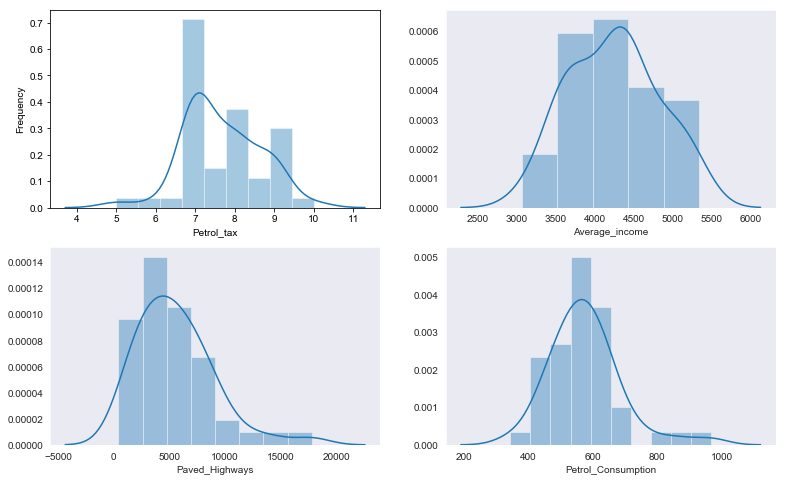

In [22]:
#plotting histograme of continuous variables to observe distribution of data.

fig=plt.figure(figsize=(13,8))
ax1=fig.add_subplot(2,2,1)

sns.set_style("dark")
sns.distplot(dataset['Petrol_tax'])

plt.ylabel('Frequency')
#plt.title(dataset['Petrol_tax'])

ax1=fig.add_subplot(2,2,2)

sns.set_style("dark")
sns.distplot(dataset['Average_income'])
#plt.title(dataset['Average_income'])
ax1=fig.add_subplot(2,2,3)

sns.set_style("dark")
sns.distplot(dataset['Paved_Highways'])
#plt.title(dataset['Paved_Highways'])
ax1=fig.add_subplot(2,2,4)

sns.set_style("dark")
sns.distplot(dataset['Petrol_Consumption'])
#plt.title(dataset['Petrol_Consumption'])


plt.show()

    -Last two variables are seems very good normally distributed.
     But first couple of variables shows screwed.so we need to apply scalling method to keep 
     normally distributrd variables.
    

# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

## get correlations of each features in dataset


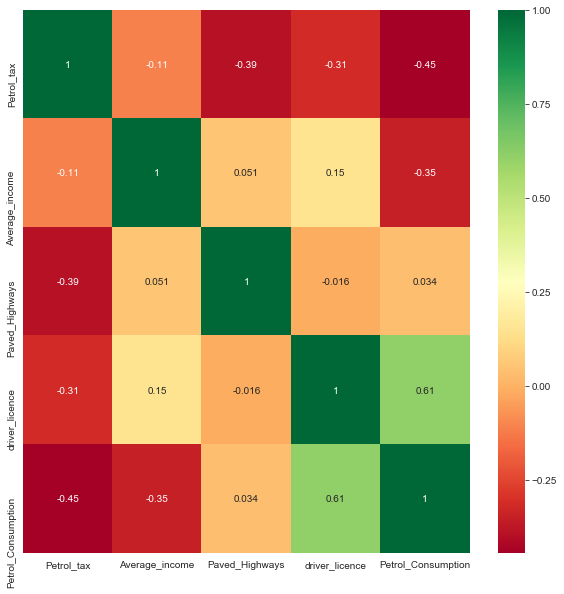

In [67]:
coral = dataset.corr()
top_corr_features = coral.index
plt.figure(figsize=(10,10))
#plot heat map
#sns.heatmap(data[top_corr_features].corr(), vmin=0, vmax=1)
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## OUTLIERS

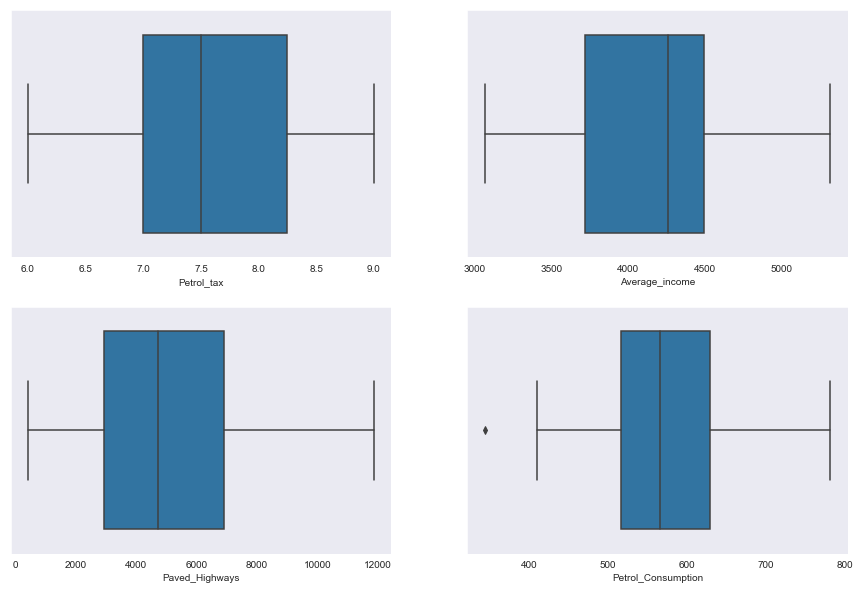

In [68]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)

sns.set_style("dark")
sns.boxplot(dataset['Petrol_tax'])
#plt.title("whitegrid")

ax1=fig.add_subplot(2,2,2)

sns.set_style("dark")
sns.boxplot(dataset['Average_income'])
#plt.title("whitegrid")
ax1=fig.add_subplot(2,2,3)

sns.set_style("dark")
sns.boxplot(dataset['Paved_Highways'])
#plt.title("whitegrid")
ax1=fig.add_subplot(2,2,4)

sns.set_style("dark")
sns.boxplot(dataset['Petrol_Consumption'])
#plt.title("whitegrid")


plt.show()


In [69]:
Q1 = dataset.quantile(0.25)
Q3 =dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Petrol_tax               1.25
Average_income         774.50
Paved_Highways        3971.00
driver_licence           0.06
Petrol_Consumption     112.50
dtype: float64


In [70]:

(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

,Average_income,Paved_Highways,Petrol_Consumption,Petrol_tax,chart,driver_licence
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
7,False,False,True,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False
10,False,False,False,False,False,False
11,False,False,False,False,False,False


In [71]:

dataset=dataset[~((dataset< (Q1 - 1.5 * IQR)) |(dataset> (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(42, 6)

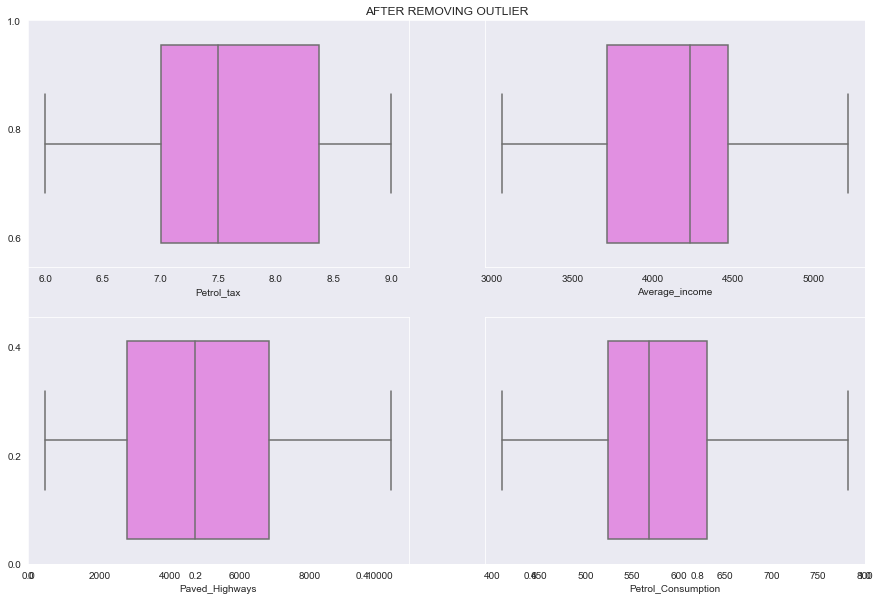

In [72]:
fig=plt.figure(figsize=(15,10))
plt.title('AFTER REMOVING OUTLIER')
ax1=fig.add_subplot(2,2,1)

sns.set_style("dark")
sns.boxplot(dataset['Petrol_tax'],color='violet')
#plt.title("whitegrid")

ax1=fig.add_subplot(2,2,2)

sns.set_style("dark")
sns.boxplot(dataset['Average_income'],color='violet')
#plt.title("whitegrid")
ax1=fig.add_subplot(2,2,3)

sns.set_style("dark") 
sns.boxplot(dataset['Paved_Highways'],color='violet')
#plt.title("whitegrid")
ax1=fig.add_subplot(2,2,4)

sns.set_style("dark")
sns.boxplot(dataset['Petrol_Consumption'],color='violet')
#plt.title("whitegrid")


plt.show()

##Distribution of independant continuose variales


# Standard Scaller

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution 

is now centred around 0, with a standard deviation of 1. 

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(dataset.drop(columns='chart',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
data=scaler.transform(dataset.drop(columns='chart',axis=1))

In [77]:
x1=dataset.drop(columns=['Petrol_Consumption','chart'])## independent features

y1=dataset['Petrol_Consumption'] ## dependent features

# Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

# feature selection

#feature selection is the techique to find important features from dataset.
#reduce dimentionality of model we choose only those features that are positively or nagatively corealted to 'Depandent Variable'.


In [78]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x1,y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
print(model.feature_importances_)

[0.22116368 0.295724   0.16576508 0.31734723]


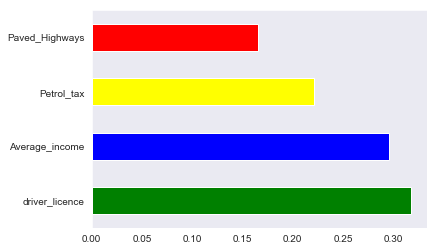

In [80]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x1.columns)
col=['Green','Blue','Yellow','Red']
feat_importances.nlargest(5).plot(kind='barh', color=col)
plt.show()

# Linear Regression

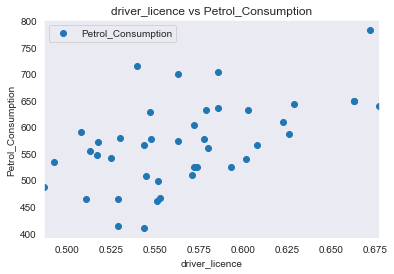

In [81]:
#And finally, let’s plot our data points on a 2-D graph to eyeball our dataset 
#and see if we can manually find any relationship between the data using the 
#below script :
dataset.plot(x='driver_licence', y='Petrol_Consumption', style='o')  
plt.title('driver_licence vs Petrol_Consumption')  
plt.xlabel('driver_licence')  
plt.ylabel('Petrol_Consumption')  
plt.show()

# Train Test split

In [82]:
x = dataset[['driver_licence']].values
y = dataset['Petrol_Consumption'].values

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0 )

In [85]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
y_test

array([487., 632., 554., 410., 508., 534., 577., 566., 591.])

In [87]:
x_test

array([[0.487],
       [0.603],
       [0.513],
       [0.544],
       [0.545],
       [0.493],
       [0.578],
       [0.608],
       [0.508]])

In [88]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

10.345870055428577
[986.91733138]


In [89]:
y_pred = regressor.predict(x_test)

In [90]:
y_test

array([487., 632., 554., 410., 508., 534., 577., 566., 591.])

In [91]:
y_pred

array([490.97461044, 605.45702088, 516.63446105, 547.22889832,
       548.21581566, 496.89611442, 580.78408759, 610.39160753,
       511.69987439])

In [92]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,487.0,490.974610
1,632.0,605.457021
2,554.0,516.634461
3,410.0,547.228898
4,508.0,548.215816
5,534.0,496.896114
6,577.0,580.784088
7,566.0,610.391608
8,591.0,511.699874


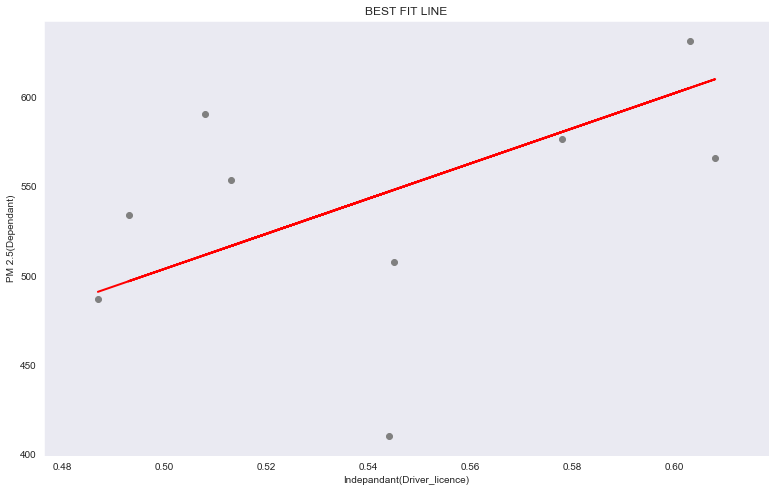

In [93]:
plt.figure(figsize=(13,8))
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test,y_pred, color='red', linewidth=2)
plt.xlabel('Indepandant(Driver_licence)')
plt.ylabel('PM 2.5(Dependant)')
plt.title('BEST FIT LINE')
plt.show()

<Figure size 1800x1080 with 0 Axes>

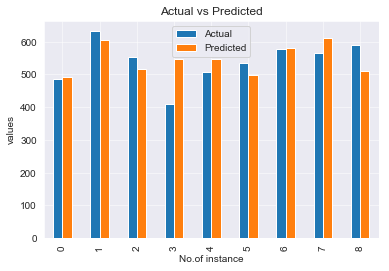

In [94]:
plt.figure(figsize=(25,15))
df1 = df.head(25)
df1.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.title('Actual vs Predicted')
plt.xlabel('No.of instance')
plt.ylabel('values')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

Mean Absolute Error
2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:


Mean Squared Error
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


Root Mean Squared Error
Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [95]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 45.545283199229225
Mean Squared Error: 3579.5261686658905
Root Mean Squared Error: 59.8291414668963
